**Renato Dias Ferreira Campos - 821328** <br/>
**Murilo Eduardo Feijo Ramos - 824389**


<h1/>Trabalho De Aprendizado de Máquina Supervisionado<h1/>

## 1. Introdução
Este relatório analisa o desempenho do modelo de **Árvore de Decisão** para a previsão do diagnóstico de Alzheimer. A análise se baseia em métricas de desempenho obtidas a partir da matriz de confusão e considera o impacto da distribuição dos dados no modelo.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("alzheimers_prediction_dataset.csv")

In [3]:
#Apresentação dos nossos dados
df.head(30)

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No
5,Spain,55,Female,2,34.0,Medium,Current,Never,No,No,...,Healthy,Low,Retired,Married,No,Low,Medium,High,Rural,No
6,South Korea,91,Female,18,24.1,High,Former,Occasionally,No,Yes,...,Average,High,Employed,Widowed,No,High,Low,Medium,Urban,No
7,China,67,Female,11,23.6,Low,Current,Regularly,No,No,...,Unhealthy,Low,Unemployed,Widowed,No,Low,Medium,High,Urban,Yes
8,China,84,Female,11,22.0,High,Current,Regularly,No,No,...,Average,High,Employed,Single,No,Medium,Low,Low,Rural,No
9,Germany,72,Female,11,32.4,Medium,Never,Occasionally,No,Yes,...,Average,High,Employed,Single,No,Low,Low,Medium,Rural,No


In [4]:
#Todas as colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [5]:
#Transformação da nossa classe categórica para binário
y = df["Alzheimer’s Diagnosis"]
y = y.map({'Yes': 1, 'No': 0})
y

0        0
1        0
2        0
3        0
4        0
        ..
74278    0
74279    0
74280    0
74281    0
74282    0
Name: Alzheimer’s Diagnosis, Length: 74283, dtype: int64

In [6]:
#Vetores X escolhidos para nossa árvore de decisão
colunas_categoricas = [
    'Country', 'Genetic Risk Factor (APOE-ε4 allele)',
    'Sleep Quality', 'Smoking Status', 'Employment Status',  
    'Air Pollution Exposure' 
]

In [7]:
#Seleção das colunas no nosso dataset
X = df[colunas_categoricas]
X = pd.concat([X, df[['Age', 'BMI', 'Cognitive Test Score', 'Education Level']]], axis = 1)
X

,Country,Genetic Risk Factor (APOE-ε4 allele),Sleep Quality,Smoking Status,Employment Status,Air Pollution Exposure,Age,BMI,Cognitive Test Score,Education Level
0,Spain,No,Poor,Never,Retired,High,90,33.0,90,1
1,Argentina,No,Good,Former,Unemployed,Medium,72,29.9,65,7
2,South Africa,No,Good,Current,Employed,Medium,86,22.9,43,19
3,China,No,Average,Never,Retired,Medium,53,31.2,81,17
4,Sweden,No,Poor,Former,Employed,High,58,30.0,49,3
...,...,...,...,...,...,...,...,...,...,...
74278,Russia,No,Poor,Former,Unemployed,High,60,22.6,42,3
74279,UK,No,Poor,Never,Unemployed,Medium,58,30.6,42,18
74280,Spain,Yes,Good,Never,Employed,Low,57,28.2,61,13
74281,Brazil,No,Good,Never,Employed,Low,73,29.0,97,7


In [8]:
# Criar o OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

In [9]:
# Aplicar OneHotEncoder às colunas categóricas
X_encoded = encoder.fit_transform(X[colunas_categoricas])


# Criar um DataFrame com os novos atributos
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(colunas_categoricas))

In [10]:
# Remover as colunas originais categóricas de X
X = X.drop(columns=colunas_categoricas)

# Concatenar X com as novas colunas codificadas
X = pd.concat([X, X_encoded_df], axis=1)

In [11]:
X.describe()

,Age,BMI,Cognitive Test Score,Education Level,Country_Argentina,Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_France,...,Sleep Quality_Poor,Smoking Status_Current,Smoking Status_Former,Smoking Status_Never,Employment Status_Employed,Employment Status_Retired,Employment Status_Unemployed,Air Pollution Exposure_High,Air Pollution Exposure_Low,Air Pollution Exposure_Medium
count,74283.000000,74283.000000,74283.000000,74283.000000,74283.000000,74283.000000,74283.000000,74283.000000,74283.000000,74283.000000,...,74283.000000,74283.000000,74283.000000,74283.000000,74283.000000,74283.000000,74283.000000,74283.000000,74283.000000,74283.000000
mean,71.964703,26.780639,64.654241,9.487514,0.050227,0.050981,0.051681,0.049958,0.048356,0.049944,...,0.328783,0.335406,0.331543,0.333051,0.333253,0.332876,0.333872,0.335285,0.331920,0.332795
std,12.980748,4.764679,20.153247,5.757020,0.218414,0.219960,0.221383,0.217859,0.214518,0.217831,...,0.469774,0.472136,0.470771,0.471308,0.471379,0.471246,0.471598,0.472093,0.470906,0.471217
min,50.000000,18.500000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.000000,22.700000,47.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72.000000,26.800000,65.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,30.900000,82.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,94.000000,35.000000,99.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42,class_weight="balanced", min_samples_split=1500, max_depth = 10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_split=1500, random_state=42)

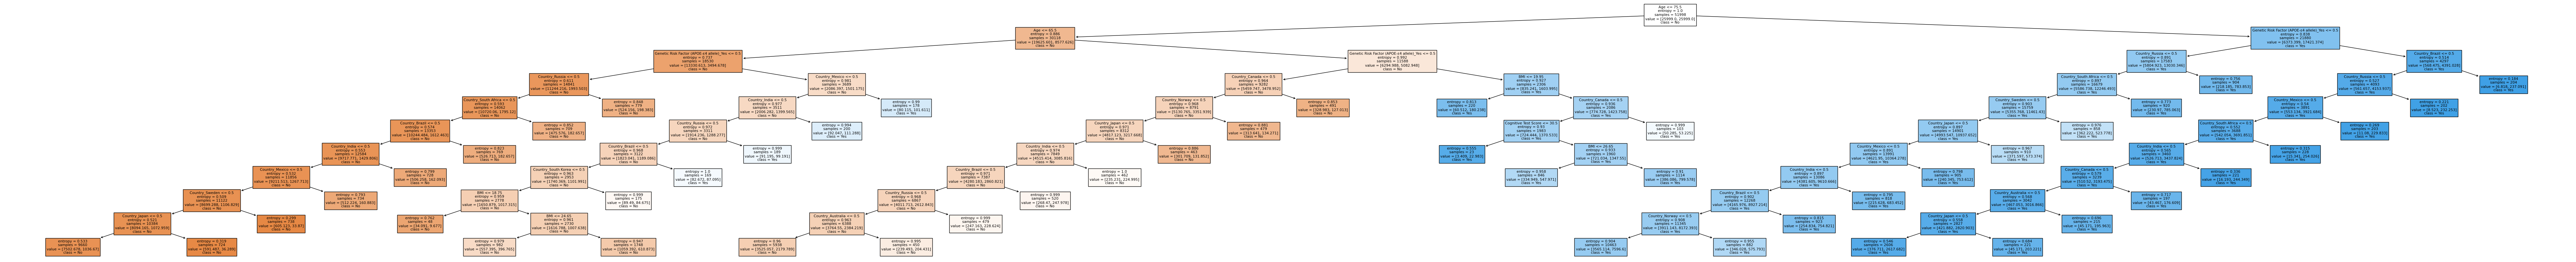

In [14]:
# Definir o tamanho da figura
plt.figure(figsize=(100, 10))

# Gerar a árvore
plot_tree(clf, filled=True, feature_names=list(X.columns), class_names=['No', 'Yes'])

# Mostrar a árvore
plt.show()

In [15]:
# Fazer previsões nos dados de teste
y_pred = clf.predict(X_test)

<h2/>2. Métricas de Avaliação do Modelo<h2/>

In [16]:
# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
print("Matriz de Confusão:")
print(matriz_confusao)


Matriz de Confusão:
[[9320 3745]
 [2365 6855]]


## **Interpretação da Matriz de Confusão**
| **Classe Real / Predita** | **Predito: Não** | **Predito: Sim** |
|-------------------------|-----------------|-----------------|
| **Real: Não** (TN)    | **9320**       | **3745** (FP)   |
| **Real: Sim** (FN)    | **2365**       | **6855** (TP)   |

- **9320 (Verdadeiros Negativos - TN)** → O modelo previu corretamente que **9320 pessoas não têm Alzheimer**.  
- **3745 (Falsos Positivos - FP)** → O modelo previu que **3745 pessoas têm Alzheimer, mas elas não têm**.  
- **2365 (Falsos Negativos - FN)** → O modelo previu que **2365 pessoas não têm Alzheimer, mas elas realmente têm**.  
- **6855 (Verdadeiros Positivos - TP)** → O modelo previu corretamente que **6855 pessoas têm Alzheimer**.  

---

In [17]:
# Contar quantos "Yes" e "No" existem na coluna "Alzheimer’s Diagnosis"
print(df["Alzheimer’s Diagnosis"].value_counts(normalize = True) * 100)


Alzheimer’s Diagnosis
No     58.654066
Yes    41.345934
Name: proportion, dtype: float64


In [18]:
# Calcular a acurácia
acuracia = accuracy_score(y_test, y_pred)

print(f"Acurácia: {acuracia:.4f}")

Acurácia: 0.7258


---

### **Acurácia**
A acurácia mede a **proporção total de previsões corretas**:


➡ O modelo acerta cerca de 72,58% das previsões, uma boa medida considerando ser diagnóstico de alzheimer

---

In [19]:
# Calcular a precisão
precisao = precision_score(y_test, y_pred)

print(f"Precisão: {precisao:.4f}")

Precisão: 0.6467


### **Precisão (para classe "Sim")**
A precisão mede **quantas das previsões de "Sim" (Alzheimer) estavam corretas**:


➡ **64,67% das previsões de Alzheimer estavam corretas.**  
➡ Ainda há um número considerável de **falsos positivos (3745)**, o que pode levar a diagnósticos errados.

--- indica a proporção de previsões de Alzheimer que estavam corretas, ou seja, de todos os casos em que o modelo previu "Sim", quantos realmente tinham Alzheimer

In [20]:
# Calcular a revocação
revocacao = recall_score(y_test, y_pred)

print(f"Revocação: {revocacao:.4f}")

Revocação: 0.7435


---

### **Revocação**
A revocação mede **quantos dos pacientes reais com Alzheimer o modelo conseguiu identificar corretamente**:


➡ **O modelo identificou corretamente 74,35% dos pacientes reais com Alzheimer.**  
➡ Isso significa que **25,65% dos pacientes com Alzheimer foram erroneamente classificados como "Não"**.

---

In [21]:
# Calcular a medida-F
f1 = f1_score(y_test, y_pred)

print(f"Medida-F: {f1:.4f}")


Medida-F: 0.6917


---

### **Medida-F**
A Medida-F é a **média harmônica entre precisão e revocação**, equilibrando as duas métricas:


➡ O modelo tem um **equilíbrio melhor entre precisão e revocação**, conseguindo prever melhor os casos reais de Alzheimer.

---

## 3. Considerações Finais
- O **Alzheimer é uma doença de diagnóstico complexo**, pois pode ser influenciado por fatores genéticos, ambientais e comportamentais, tornando-o **altamente variável** e **difícil de prever** com precisão absoluta.  
- A **desigualdade na distribuição dos dados** (mais "Não" do que "Sim") pode estar influenciando o desempenho do modelo.  